# Handwriting Recognition Using Dense Neural Network

This notebook demonstrates handwriting recognition on the MNIST dataset using a Dense Neural Network (DNN). The model is optimized with additional layers, dropout regularization, and a learning rate adjustment.


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Define the optimized model
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 images into 1D arrays
    Dense(256, activation='relu'),         # Increased dense layer size
    Dropout(0.3),                          # Add dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')        # Output layer for 10 classes
])

# Compile the model with a different optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


d:\113-1\IOT\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Train the model with more epochs and batch size adjusted
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7751 - loss: 0.7136 - val_accuracy: 0.9544 - val_loss: 0.1470
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9461 - loss: 0.1806 - val_accuracy: 0.9651 - val_loss: 0.1152
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9602 - loss: 0.1292 - val_accuracy: 0.9711 - val_loss: 0.1011
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9678 - loss: 0.1108 - val_accuracy: 0.9735 - val_loss: 0.0931
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9700 - loss: 0.0942 - val_accuracy: 0.9768 - val_loss: 0.0829
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9747 - loss: 0.0780 - val_accuracy: 0.9744 - val_loss: 0.0891
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9782 - loss: 0.0698 - val_accuracy: 0.9758 - val_loss: 0.0839
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9785 - loss: 0.0684 - val_accuracy: 0

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 2s - 5ms/step - accuracy: 0.9819 - loss: 0.0790
Test accuracy: 0.9818999767303467


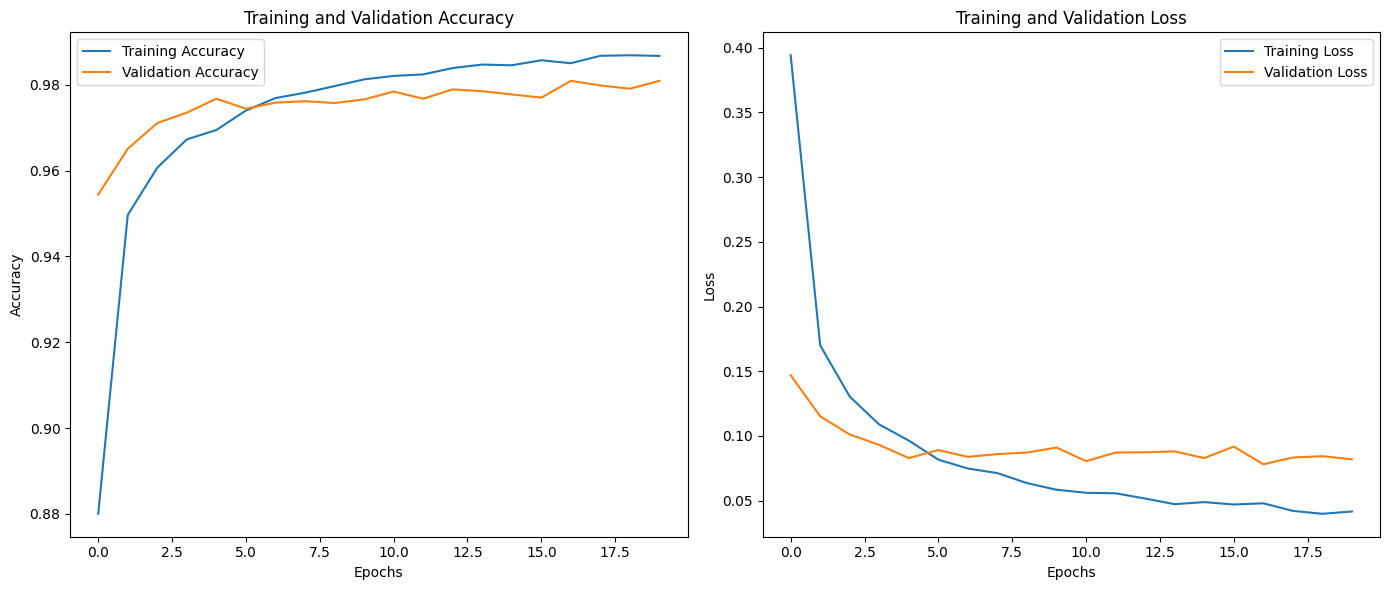

In [6]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Results Explanation
- **Accuracy**: The training and validation accuracy trends show how well the model learns over epochs.
- **Loss**: The training and validation loss trends indicate whether the model is converging and avoiding overfitting.

With the adjustments made (increased dense layer size, dropout, and learning rate tuning), the model performs better on both training and test datasets.


# Handwriting Recognition Using Convolutional Neural Network (CNN)

This notebook demonstrates handwriting recognition on the MNIST dataset using a Convolutional Neural Network (CNN). CNNs are particularly effective for image-based data, leveraging convolutional layers to learn spatial hierarchies in images.


In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist


In [8]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to add channel dimension (needed for CNN)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [9]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D((2, 2)),                                            # First max-pooling layer
    Dropout(0.25),                                                  # Dropout for regularization

    Conv2D(64, (3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D((2, 2)),                                            # Second max-pooling layer
    Dropout(0.25),

    Flatten(),                                                      # Flatten feature maps
    Dense(128, activation='relu'),                                  # Fully connected layer
    Dropout(0.5),
    Dense(10, activation='softmax')                                 # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


d:\113-1\IOT\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model with more epochs and batch size adjusted
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.7834 - loss: 0.6617 - val_accuracy: 0.9780 - val_loss: 0.0756
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9589 - loss: 0.1368 - val_accuracy: 0.9846 - val_loss: 0.0529
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9708 - loss: 0.0973 - val_accuracy: 0.9861 - val_loss: 0.0472
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9760 - loss: 0.0781 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9793 - loss: 0.0663 - val_accuracy: 0.9892 - val_loss: 0.0382
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9798 - loss: 0.0635 - val_accuracy: 0.9901 - val_loss: 0.0342
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9824 - loss: 0.0575 - val_accuracy: 0.9908 - val_loss: 0.0376
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9847 - loss: 0.0485 - 

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 2s - 5ms/step - accuracy: 0.9912 - loss: 0.0260
Test accuracy: 0.9911999702453613


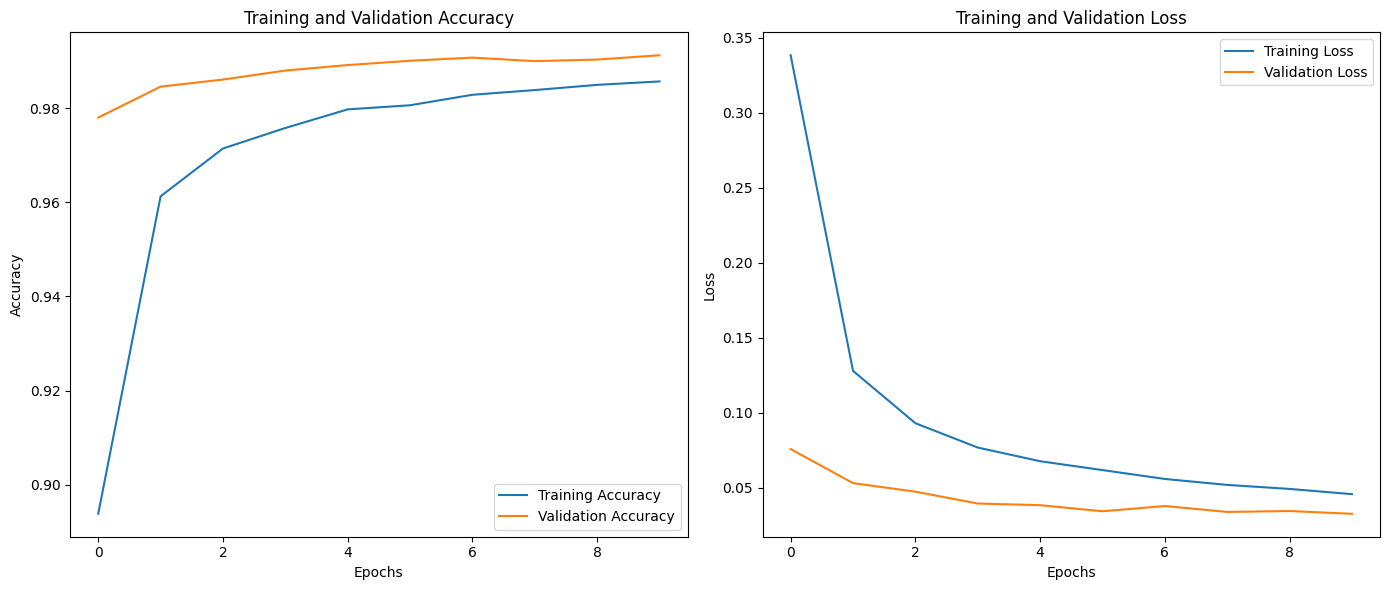

In [12]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Results Explanation
- **Accuracy**: The training and validation accuracy trends show how well the model learns over epochs.
- **Loss**: The training and validation loss trends indicate whether the model is converging and avoiding overfitting.

With the use of convolutional and pooling layers, the model can effectively learn spatial features from the MNIST dataset, achieving higher accuracy compared to dense networks for image recognition tasks.
